## Observations and Insights 

From the data that has been obtained and calculated, I have noticed the following:
- While a simple observation, the overall number percentage bewteen male and female mice was essentially equal. This means that the data can be applied to both genders with relative certainty.
- While only four of the ten drug types were taken to find outliers in its data, the extensive number of timepoints were taken implies that the number of outliers was minimized. This means that predictions in correlation for other drugs can be taken with some certainty.
- From the scatterplot data of the drug "Capomulin", it seems that there is a strong correlation between tumor volume and mouse weight based off of the correlation coefficient and the regression line.

In [1]:
# Note: Because information was also taken from other sources, I will try to explain where I can. - Mark

# P.S.: Due to the fact that at the time this was sent, there was no image that showed how each of the results looked like,
# some of the results that I have made are loosely based on other submissions.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "Data/Mouse_metadata.csv"
study_results_path = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left") # Left join to ensure data is not lost

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique() # ("nunique" ensures null values are not counted.)

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_data_df[combined_data_df.duplicated(["Mouse ID","Timepoint"])] # ".duplicated()" returns identical values based
                                                                        # off of the first argument and sorts it in
                                                                        # ascending order in the second argument

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df[combined_data_df["Mouse ID"] == "g989"] # ("==" means "always equal to")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df = combined_data_df[combined_data_df["Mouse ID"] != "g989"]

In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_df["Mouse ID"].nunique() # (Notice the value is one less than it is before, meaning that the dupe was dropped)

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# + mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()     # (Brackets are used for Tumor Volume as
median = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median() #  they cannot be called to otherwise, and
variance = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()  #  those values are not strings)
standard_deviation = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
SEM = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "Mean": mean,
    "Median": median,
    "Variance": variance,
    "Standard Deviation": standard_deviation,
    "Standard Error Mean": SEM
    }
)
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table = cleaned_data_df.groupby("Drug Regimen")["Tumor Volume (mm3)"]

# Using the aggregation method, produce the same summary statistics in a single line
summary_table.agg(["mean", "median", "var", "std", "sem"]) # (Shorthanded lowercase has to be used, as it calls to the
                                                           #  naming shortcuts when calculating those values)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

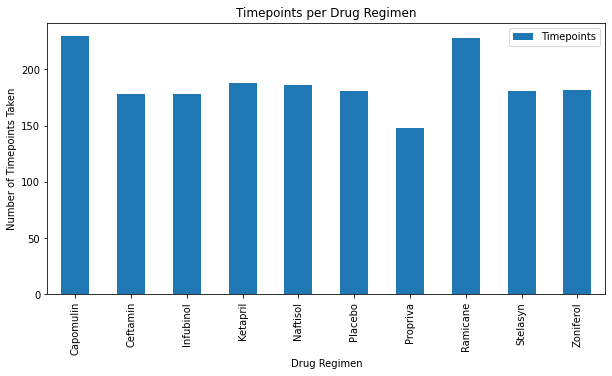

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_regimen_data = pd.DataFrame(cleaned_data_df.groupby(["Drug Regimen"]).count()).reset_index()

# (Gathering the plot data)
drug_regimen = drug_regimen_data[["Drug Regimen", "Mouse ID"]] # (This is used to change the dataframe to only two columns)
drug_regimen = drug_regimen.rename(columns={"Mouse ID": "Timepoints"})
drug_regimen = drug_regimen.set_index("Drug Regimen") # (This sets the blank index as the x-axis)

# (Displaying the bar plot)
drug_regimen.plot(kind="bar", figsize=(10,5))
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints Taken")
plt.show()

In [11]:
# (Slight prework: Converting the regimen count to a list and to display the numbers used for each bar)
regimen_count = (cleaned_data_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
regimen_count

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0, 0.5, 'Number of Timepoints Taken')

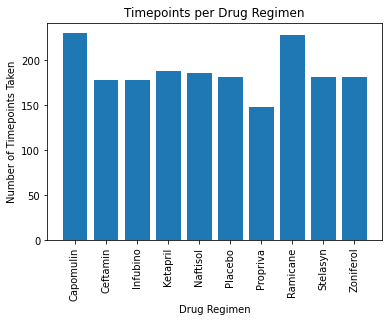

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = ["Capomulin", "Ceftamin", "Infubino", "Ketapril", "Naftisol", 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
drug_count = regimen_count

# (Creating the actual bar plot)
plt.bar(x_axis, drug_count, alpha=1, align="center")
tick_locations = [value for value in x_axis] # (A shortcut in not having to type out all the names over again)
plt.xticks(rotation=90)
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints Taken")

In [13]:
# (Slight prework: Find the total number of male and female mice in thet dataset, by "Sex" and "Mouse ID")
gender_df = pd.DataFrame(cleaned_data_df.groupby(["Sex"]).count()).reset_index()
gender_df.head()

# (This is necessary to only filter out to the first two columns only)
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

,Sex,Count
0,Female,922
1,Male,958


Text(0, 0.5, '')

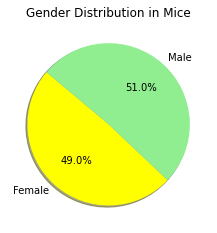

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas (this data uses the info from earlier)
plt.figure(figsize=(8,8))
axes = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y="Count", ax=axes, labels=gender_df["Sex"], colors=["yellow","lightgreen"], autopct="%1.1f%%", shadow=True, legend=False, startangle=140)
plt.title("Gender Distribution in Mice")
plt.ylabel("") # (This is to remove the y-label, as by default it will add it to the graph)

In [15]:
# (Slight prework: Find out the number of unique males and unique females within the table)
male_count = cleaned_data_df.loc[cleaned_data_df["Sex"] == "Male"]
male_count["Mouse ID"].nunique()

125

In [16]:
female_count = cleaned_data_df.loc[cleaned_data_df["Sex"] == "Female"]
female_count["Mouse ID"].nunique()

123

Text(0.5, 1.0, 'Gender Distribution in Mice')

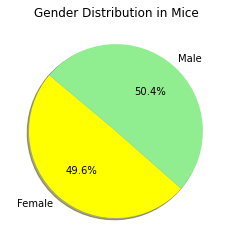

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Female", "Male"]
gender_count = [123, 125]
colors = ["yellow", "lightgreen"]

plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Gender Distribution in Mice")

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_greatest = cleaned_data_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_last_volume = pd.merge(cleaned_data_df, timepoint_greatest, on=["Mouse ID","Timepoint"]) # (Reminder that when not
                                                                                               #  specified, default join
                                                                                                # is "inner")

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
for drug in drug_list: # (This loop is to simplify the need to calculate each drug data individually)
    volume_df = tumor_last_volume.loc[tumor_last_volume["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume_df)
    
    quartiles = volume_df.quantile([0.25,0.5,0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    lower_bound = quartiles[0.25] - (1.5*IQR) # (The quartiles and IQR are calculated here, for the graph)
    upper_bound = quartiles[0.25] + (1.5*IQR)
    
    # Determine outliers using upper and lower bounds
    outliers = volume_df.loc[(volume_df > upper_bound) | (volume_df < lower_bound)]

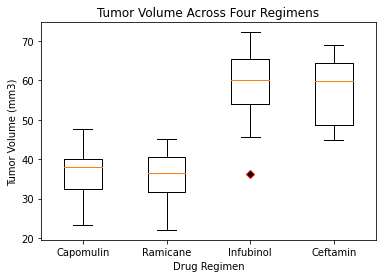

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
outlier_dot = dict(markerfacecolor="black",marker="D",markeredgecolor="r")
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_volume,flierprops=outlier_dot)
ax1.set_title("Tumor Volume Across Four Regimens")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.xaxis.set(ticks=range(1,len(drug_list)+ 1), ticklabels=drug_list)
plt.show()

## Line and Scatter Plots

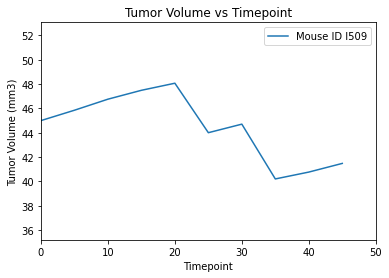

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin (A random mouse, not randomly chosen by me)
mouse_sample = (cleaned_data_df[cleaned_data_df["Drug Regimen"] == "Capomulin"]).sample()
sample_data = pd.merge(cleaned_data_df, mouse_sample, on="Mouse ID")

# (Basically tells the data to drop samples on the merge as by default a merge will use an "_x" and "_y" if unspecified)
sample_dataframe = sample_data.drop([column for column in sample_data.columns if "_y" in column], axis=1)

time = sample_dataframe["Timepoint_x"]
volume = sample_dataframe["Tumor Volume (mm3)_x"] # (Basically telling the data to base its info off of the original data,
label = sample_dataframe["Mouse ID"].unique()     #  as the merged ["_y"] data is dropped)

# (Making the graph itself - Note that it will change every time its run)
line, = plt.plot(time, volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint")
plt.xlim(0, time.max() + 5)
plt.ylim(volume.min() - 5, volume.max() + 5)
plt.legend("Mouse ID " + label)
plt.show()

y = 0.95x + 21.55


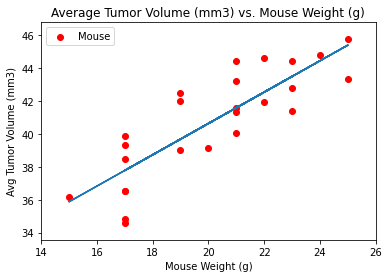

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_regimen = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Capomulin"]
volume_tumor = Capomulin_regimen.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
weight_mouse = Capomulin_regimen.groupby(["Mouse ID"])["Weight (g)"].mean()

volume_weight_average = pd.merge (volume_tumor, weight_mouse, on="Mouse ID")
volume_weight_average = volume_weight_average.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
vol = volume_weight_average.iloc[:,0]
weight = volume_weight_average.iloc[:,1]

# (Building the actual plot)
fig2, ax2 = plt.subplots()
ax2.scatter(weight, vol, facecolors="red",edgecolors="red")
ax2.legend(["Mouse"],loc="upper left")
plt.title("Average Tumor Volume (mm3) vs. Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(vol.min() - 1, vol.max() + 1)
plt.xlim(weight.min() - 1, weight.max() + 1)


# (Placing the linear regression model in the same graph)
slope, intercept, rvalue, pvalue, std_err = st.linregress(weight, vol)
line = slope * weight + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(weight, line)


print(line_eq)
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_coefficient = round(st.pearsonr(weight, vol)[0],2)
print(f"The correlation coefficient for this graph is {correlation_coefficient}.")

The correlation coefficient for this graph is 0.84.
